In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt


drive.mount('/content/gdrive/', force_remount=True)

# import os
# os.chdir("/content/gdrive/MyDrive/")
# !ls -l "/content/gdrive/MyDrive/41257050O_112-2-LATIA"
import pandas as pd

csv_file = '/content/gdrive/MyDrive/41257050O_112-2-LATIA/students_adaptability_level_online_education (2).csv'
df = pd.read_csv(csv_file)
# df=pd.read_csv(csv_file, encoding='big5')
print(df)
# print(df.head(), '\n')
# print('\n', df.info(verbose=True, show_counts=True))

# print('\n', df.isna().sum())
# print('\n', df.describe(include='all'))

Mounted at /content/gdrive/
     Gender     Age Education Level Institution Type IT Student Location  \
0       Boy   21-25      University   Non Government         No      Yes   
1      Girl   21-25      University   Non Government         No      Yes   
2      Girl   16-20         College       Government         No      Yes   
3      Girl   11-15          School   Non Government         No      Yes   
4      Girl   16-20          School   Non Government         No      Yes   
...     ...     ...             ...              ...        ...      ...   
1200   Girl   16-20         College   Non Government         No      Yes   
1201   Girl   16-20         College   Non Government         No       No   
1202    Boy  11る15ら          School   Non Government         No      Yes   
1203   Girl   16-20         College   Non Government         No       No   
1204   Girl  11る15ら          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Networ

在調查中，男性和女性的比例如何分布？

Boy     663
Girl    542
Name: Gender, dtype: int64
調查學生男女比：122.32


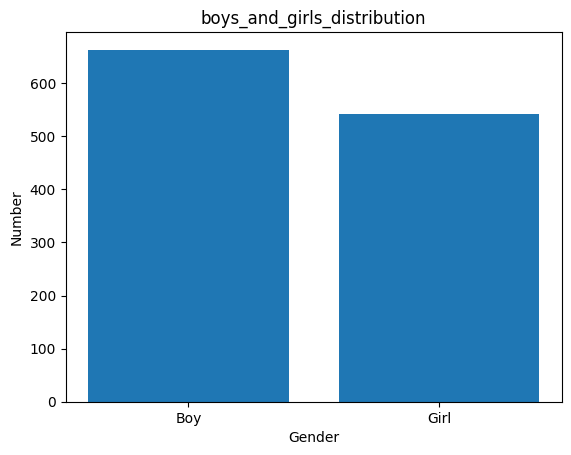

In [21]:
import matplotlib.pyplot as plt
import os
gender_count=df['Gender'].value_counts()
print(gender_count)
ratio=gender_count['Boy']/gender_count['Girl']*100
print(f'調查學生男女比：{round(ratio,2)}')

plt.bar(gender_count.index, gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title('boys_and_girls_distribution')
save_path = os.path.join('/content/gdrive/MyDrive/41257050O_112-2-LATIA', 'Question1.png')
plt.savefig(save_path)

参與調查者的年龄分布如何？

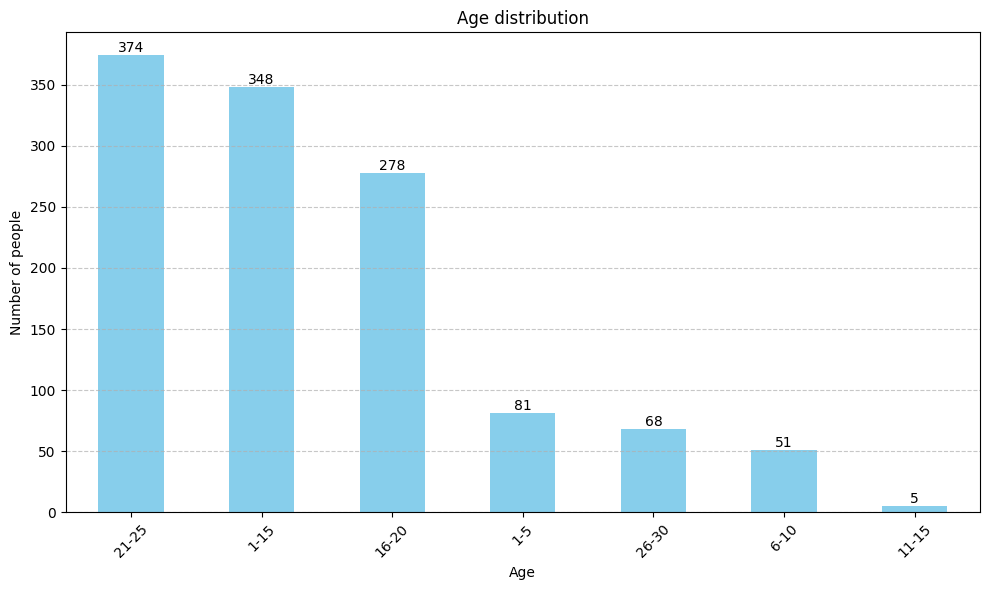

In [24]:
import matplotlib.pyplot as plt

age_count=df['Age_new'].value_counts()
age_count_sorted = age_count.sort_index()
age_count_sorted_df = age_count_sorted.reset_index()



# 从数据框 df 中获取 Age_new 列的值计数，并将结果保存在 age_count 中。
# 对 age_count 进行按索引排序，并将结果保存在 age_count_sorted 中。
# 将排序后的计数转换为 DataFrame 格式，保存在 age_count_sorted_df 中。
# 计算 '11-15' 和 '11-16' 两个年龄段的总人数，并将结果保存在 sum4 中。
# 从 age_count 中删除 '11-15' 和 '11-16' 这两个年龄段。
# 将 '11-15' 这个年龄段的值设置为之前计算的总人数 sum4。
plt.figure(figsize=(10, 6))
age_count.plot(kind='bar', color='skyblue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.xticks(rotation=45)
for i in range(len(age_count)):
    plt.text(i,age_count.values[i], str(age_count.values[i]), ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_path = os.path.join('/content/gdrive/MyDrive/41257050O_112-2-LATIA', 'Question2.png')
plt.savefig(save_path)
# plt.bar(gender_count.index, gender_count.values)
# plt.xlabel('Gender')
# plt.ylabel('Number')
# plt.title('boys_and_girls_distribution')
# plt.show()

#因為有些資料年齡範圍較大，只能將其統整計算，也不方便將其人數平均分攤在各年齡，因為可能的狀況很多，為避免造成誤差所以以此做統計。

在調查的人群中，教育水平的分布情况是怎樣的？



School        530
University    456
College       219
Name: Education Level, dtype: int64


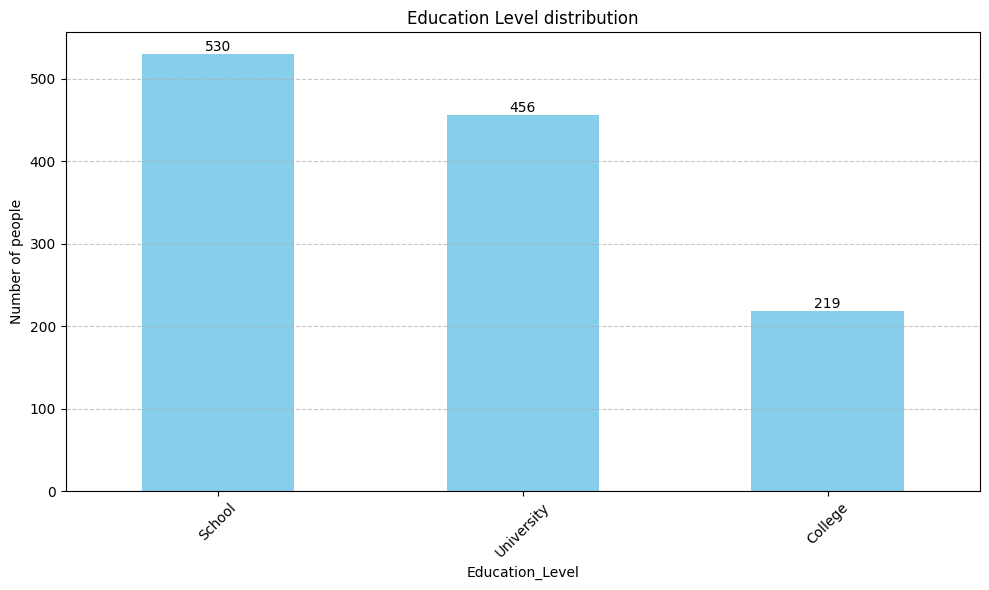

In [25]:
import matplotlib.pyplot as plt

Education_Level_count=df['Education Level'].value_counts()
Education_Level_count_sorted = age_count.sort_index()
Education_Level_count_sorted_df = Education_Level_count_sorted.to_frame()

print(Education_Level_count)

plt.figure(figsize=(10, 6))
Education_Level_count.plot(kind='bar', color='skyblue')
plt.title('Education Level distribution')
plt.xlabel('Education_Level')
plt.ylabel('Number of people')
plt.xticks(rotation=45)
for i in range(len(Education_Level_count)):
    plt.text(i,Education_Level_count.values[i], str(Education_Level_count.values[i]), ha='center', va='bottom')
# i：表示当前柱形的索引，即柱形的位置。
# Education_Level_count.values[i]：表示当前柱形对应的值，即柱形的高度或数量。
# str(Education_Level_count.values[i])：将当前柱形的值转换为字符串格式，以便在图表中显示。
# ha='center'：表示水平对齐方式为居中，即将文本水平居中对齐于当前柱形。
# va='bottom'：表示垂直对齐方式为底部，即将文本的底部与当前柱形的顶部对齐。
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_path = os.path.join('/content/gdrive/MyDrive/41257050O_112-2-LATIA', 'Question3.png')
plt.savefig(save_path)
#其中，school通指大學以下，college專指大學，university指大學以上(ex:碩士、博士)

適應程度所占整體分別%為多少?

Adaptivity Level    High  Low  Moderate
Class Duration_new                     
0                      0  144        10
1-3                   82  290       468
3-6                   18   46       147
Adaptivity Level
High          0
Low         144
Moderate     10
Name: 0, dtype: int64


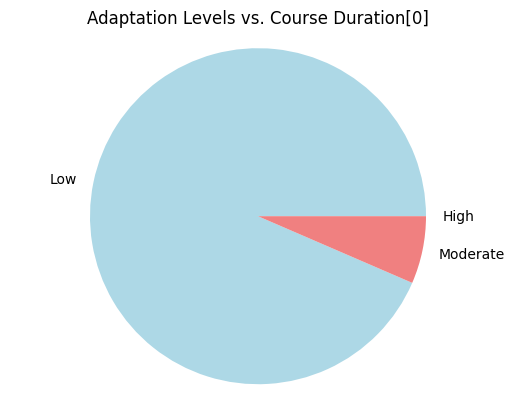

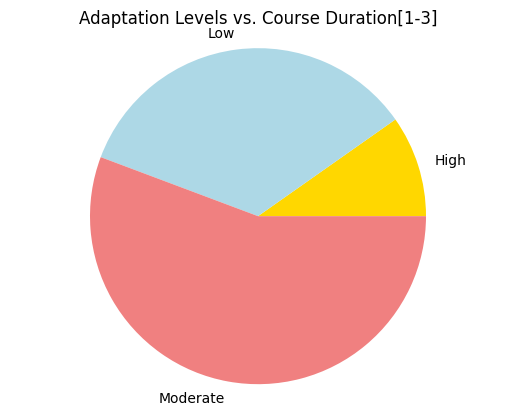

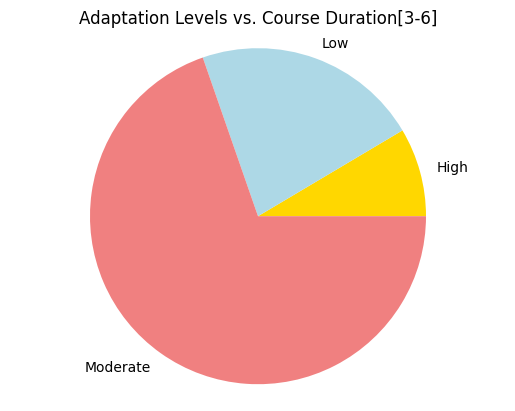

In [26]:
class_adaptivity = df.groupby(['Class Duration_new', 'Adaptivity Level']).size().unstack(fill_value=0)
print(class_adaptivity)
print(class_adaptivity.iloc[0])
colors = {'High': 'gold', 'Moderate': 'lightcoral', 'Low': 'lightblue'}
plt.pie(class_adaptivity.iloc[0], labels=class_adaptivity.iloc[0].index, colors=[colors[level] for level in class_adaptivity.iloc[0].index])
plt.axis("equal")
plt.title("Adaptation Levels vs. Course Duration[0]")
plt.show()

plt.pie(class_adaptivity.iloc[1], labels=class_adaptivity.iloc[0].index, colors=[colors[level] for level in class_adaptivity.iloc[0].index])
plt.axis("equal")
plt.title("Adaptation Levels vs. Course Duration[1-3]")
plt.show()

plt.pie(class_adaptivity.iloc[2], labels=class_adaptivity.iloc[0].index, colors=[colors[level] for level in class_adaptivity.iloc[0].index])
plt.axis("equal")
plt.title("Adaptation Levels vs. Course Duration[3-6]")
save_path = os.path.join('/content/gdrive/MyDrive/41257050O_112-2-LATIA', 'Question4.png')
plt.savefig(save_path)

網路品質是否對學生線上學習體驗有重大影響**?

0       4
1       4
2       4
3       4
4       1
       ..
1200    1
1201    4
1202    4
1203    1
1204    4
Name: Adaptivity_score, Length: 1205, dtype: int64


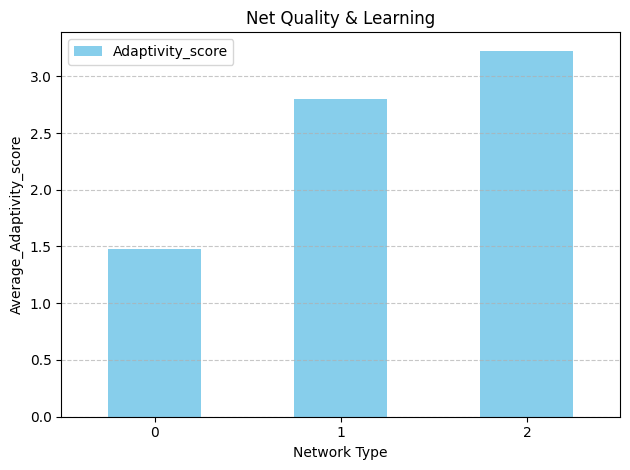

In [27]:
mapping={'Low':1, 'Moderate':4, 'High':7}
df['Adaptivity_score']=df['Adaptivity Level'].map(mapping)
print(df['Adaptivity_score'])
class_adaptivity = df.groupby('Network Type')['Adaptivity_score'].mean().reset_index()
class_adaptivity.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Network Type')
plt.ylabel('Average_Adaptivity_score')
plt.title('Net Quality & Learning')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_path = os.path.join('/content/gdrive/MyDrive/41257050O_112-2-LATIA', 'Question5.png')
plt.savefig(save_path)

受訪者的財務狀況如何？

Age_new              1-15  1-5  11-15  16-20  21-25  26-30  6-10
Financial Condition                                             
Mid                   236   42      4    241    293     35    27
Poor                   86   36      1     26     58     24    11
Rich                   26    3      0     11     23      9    13
Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64


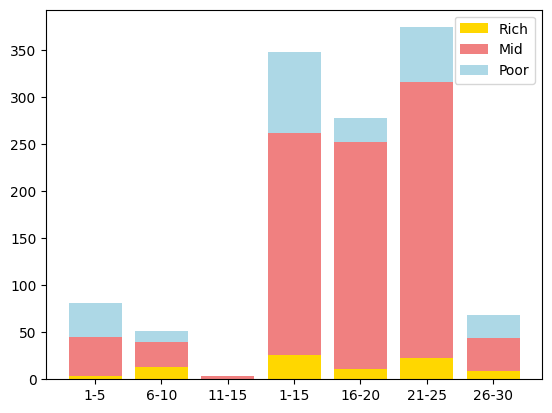

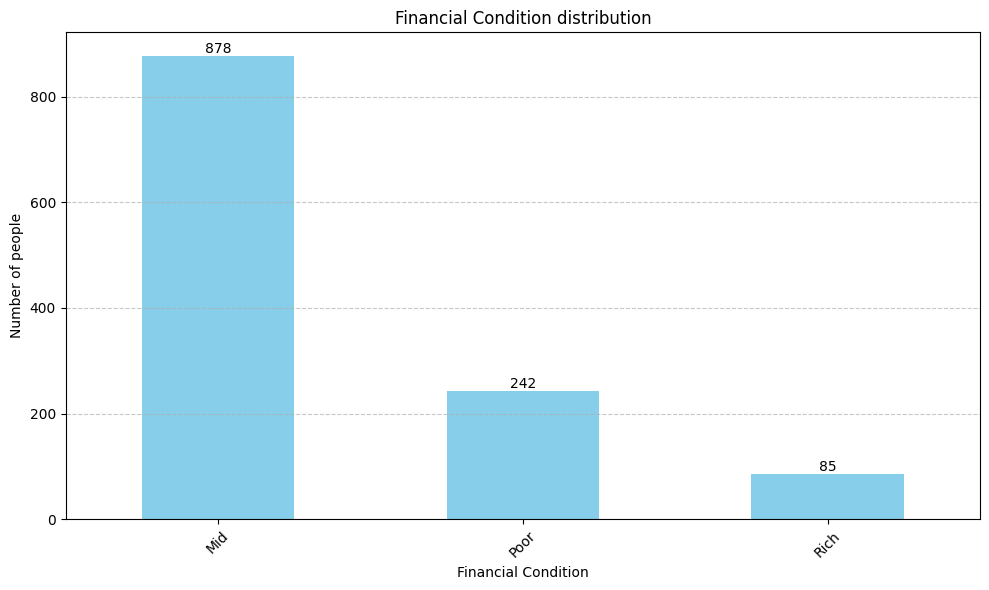

In [28]:
import matplotlib.pyplot as plt

Financial_Condition_count=df['Financial Condition'].value_counts()
Financial_Condition_count_sorted = age_count.sort_index()
Financial_Condition_count_sorted_df = Financial_Condition_count_sorted.to_frame()
import pandas as pd

# 假设有一个包含 "Age" 和 "Financial Condition" 的数据集
# df 是一个 DataFrame，包含了每个个体的年龄和财务状况信息
Financial_Condition = df.groupby(['Financial Condition', 'Age_new']).size().unstack(fill_value=0)

print(Financial_Condition)
print(Financial_Condition_count)
financial_condition_data = {
    'Rich': {'1-5': 3,'6-10': 13,'11-15': 0,'1-15': 26, '16-20': 11, '21-25': 23, '26-30': 9},
    'Mid': {'1-5': 42,'6-10': 27,'11-15': 3,'1-15': 236, '16-20': 241, '21-25': 293, '26-30': 35},
    'Poor': {'1-5': 36,'6-10': 11,'11-15': 1,'1-15': 86, '16-20': 26, '21-25': 58, '26-30': 24}}
colors = {'Rich': 'gold', 'Mid': 'lightcoral', 'Poor': 'lightblue'}
bottom = None
for condition, age_distribution in financial_condition_data.items():
    ages = list(age_distribution.keys())
    counts = list(age_distribution.values())
    plt.bar(ages, counts, bottom=bottom, label=condition, color=colors[condition])
    if bottom is None:
        bottom = counts
    else:
        bottom = [bottom[i] + counts[i] for i in range(len(counts))]
# 在循环结束后添加图例
plt.legend()

plt.figure(figsize=(10, 6))
Financial_Condition_count.plot(kind='bar', color='skyblue')
plt.title('Financial Condition distribution')
plt.xlabel('Financial Condition')
plt.ylabel('Number of people')
plt.xticks(rotation=45)
for i in range(len(Financial_Condition_count)):
    plt.text(i,Financial_Condition_count.values[i], str(Financial_Condition_count.values[i]), ha='center', va='bottom')
# i：表示当前柱形的索引，即柱形的位置。
# Education_Level_count.values[i]：表示当前柱形对应的值，即柱形的高度或数量。
# str(Education_Level_count.values[i])：将当前柱形的值转换为字符串格式，以便在图表中显示。
# ha='center'：表示水平对齐方式为居中，即将文本水平居中对齐于当前柱形。
# va='bottom'：表示垂直对齐方式为底部，即将文本的底部与当前柱形的顶部对齐。
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_path = os.path.join('/content/gdrive/MyDrive/41257050O_112-2-LATIA', 'Question6.png')
plt.savefig(save_path)